# **Data Cleaning**


In [1]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

In [2]:
# Load dataset
# Assuming your dataset is in a CSV file named 'Independent_Houses.csv'

df = pd.read_csv("Independent_Houses.csv")


In [3]:
df.head()

,Address,Distance from Wsu,Bed And Bath,Sqft,Rent
0,"2605 N Pershing St Wichita, KS 67220",0.7,4 bed 2 bath,2200.0,1475
1,1329 N Wellington Pl,2.7,4 bed 2 bath,1617.0,1025
2,"1805 N Madison Ave, Wichita, KS 67214",0.6,4 bed 2 bath,1200.0,1350
3,"7329 E 34th St N, Wichita, KS 67226",3.2,4 bed 2.5 bath,1650.0,1650
4,1406 Woodrow Ave,3.8,4 bed 1.5 bath,1748.0,1595


In [5]:
df.dtypes

Address               object
Distance from Wsu    float64
Bed And Bath          object
Sqft                 float64
Rent                   int64
dtype: object

# **Cleaning/wrangling procedure**

In [6]:
# Cleaning/wrangling procedure
# Handle missing values

df[['Bed', 'Bath']] = df['Bed And Bath'].str.split(' ', n=1, expand=True)

# Drop the original 'Bed And Bath' column
df = df.drop(columns=['Bed And Bath'])

In [7]:
# Specify the columns containing mixed data
columns_to_clean = ['Bed', 'Bath']

# Remove non-numeric characters from the specified columns and convert to float64
for column_name in columns_to_clean:
    df[column_name] = pd.to_numeric(df[column_name].replace('[^0-9.]', '', regex=True), errors='coerce')

# Save the updated DataFrame to a new CSV file
df.to_csv('Independent_Houses.csv', index=False)

In [8]:
# Remove duplicates

duplicate_rows = df[df.duplicated()]
df = df.drop_duplicates()

In [9]:
# Checking for missing values and handling it
missing_values = df.isnull()

# Count missing values in each column
missing_counts = missing_values.sum()

# Display columns with missing values and their respective counts
columns_with_missing = missing_counts[missing_counts > 0]
print(columns_with_missing)

Sqft    2
dtype: int64


In [10]:

mean_sqft = df['Sqft'].mean()

# Populate missing values with the mean
df['Sqft'].fillna(mean_sqft, inplace=True)

In [11]:
missing_sqft = df['Sqft'].isnull().sum()
print("Missing values in 'Sqft' column:", missing_sqft)

Missing values in 'Sqft' column: 0


# **Exploratory Data Analysis (EDA)**

In [13]:
# Summary statistics
print(df.describe())

       Distance from Wsu         Sqft         Rent        Bed       Bath
count          37.000000    37.000000    37.000000  37.000000  37.000000
mean            2.275676  1245.028571  1144.432432   2.918919   1.500000
std             1.197081   462.901567   383.413002   0.893755   0.565194
min             0.400000   500.000000   514.000000   1.000000   1.000000
25%             1.100000   850.000000   875.000000   2.000000   1.000000
50%             2.500000  1200.000000  1150.000000   3.000000   1.000000
75%             3.300000  1617.000000  1425.000000   4.000000   2.000000
max             4.200000  2480.000000  1800.000000   4.000000   3.000000


In [15]:
df.shape

(37, 6)

In [16]:
df.dtypes

Address               object
Distance from Wsu    float64
Sqft                 float64
Rent                   int64
Bed                    int64
Bath                 float64
dtype: object

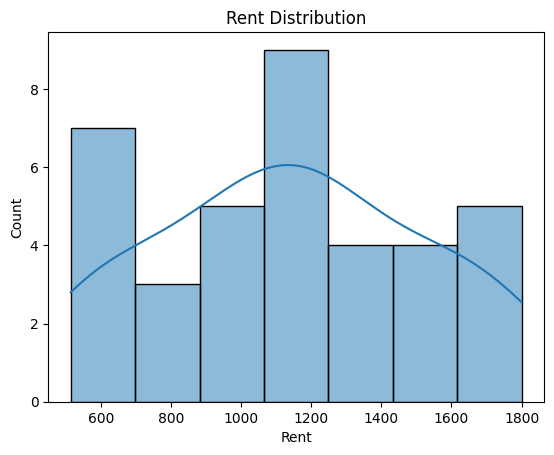

In [12]:
# Data distribution
sns.histplot(df['Rent'], kde=True)
plt.title('Rent Distribution')
plt.show()

<ipython-input-13-87929d1d3d65>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


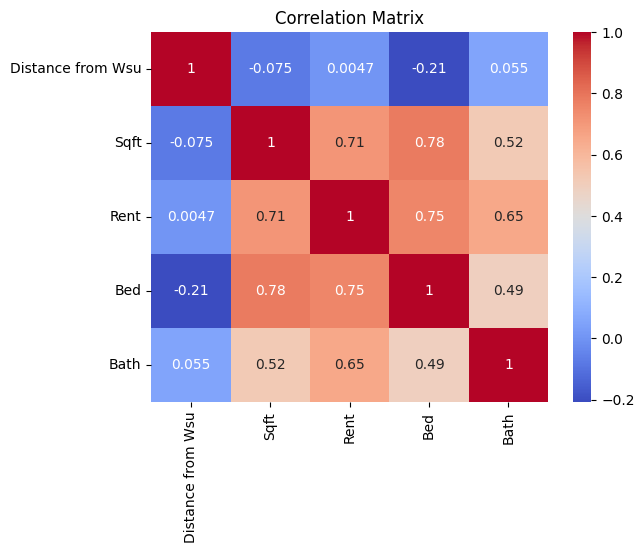

In [ ]:
# Correlation analysis
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

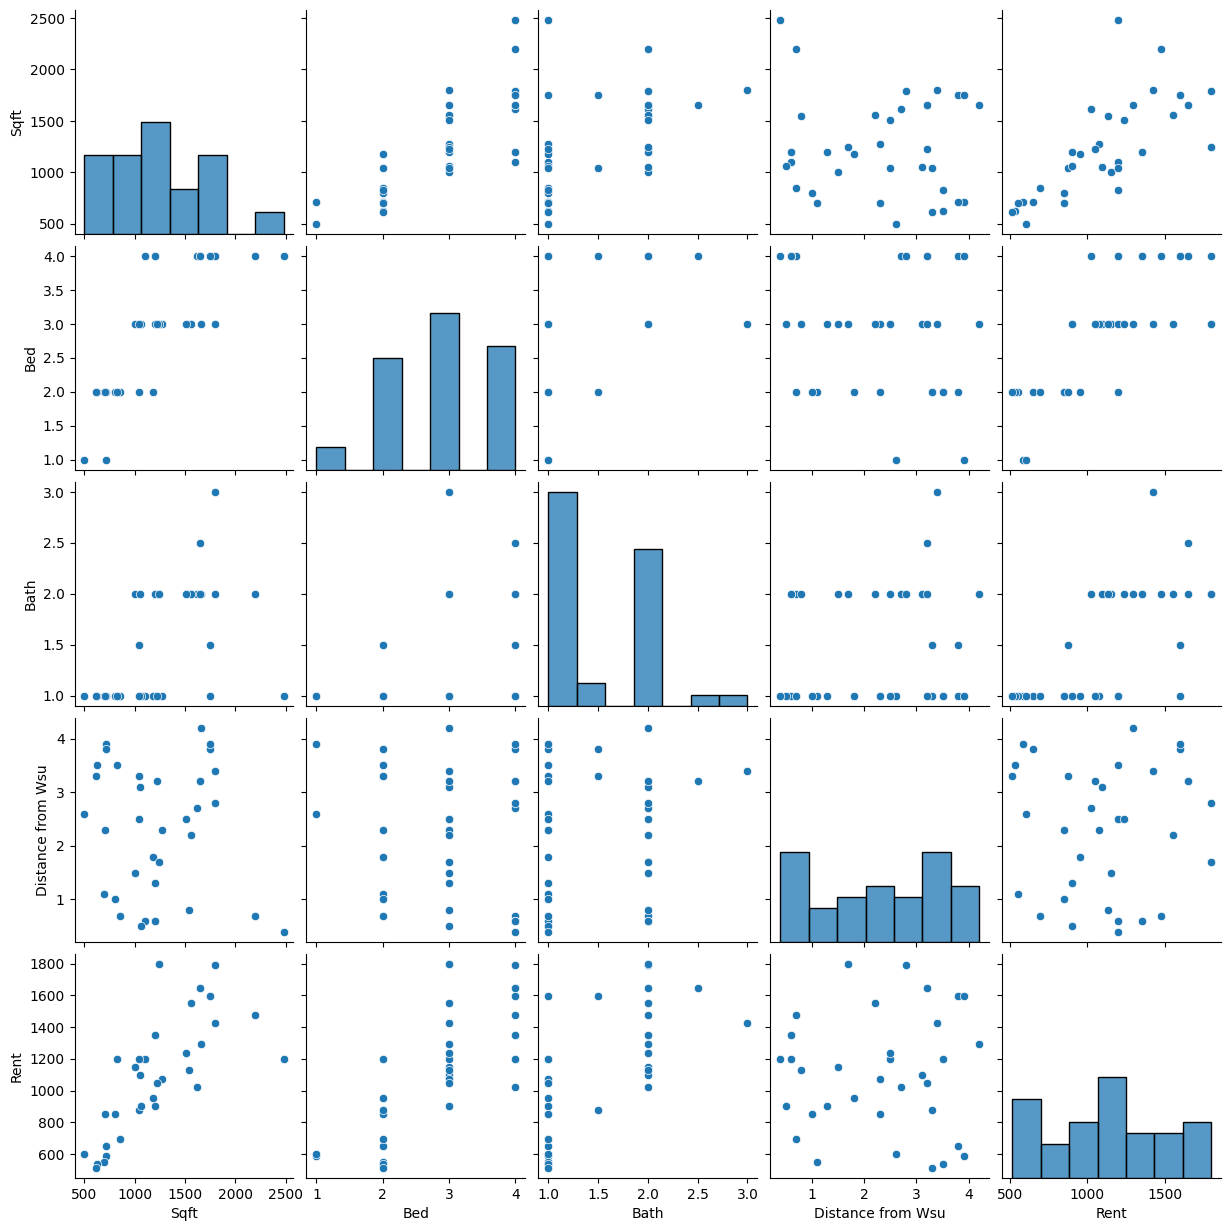

In [17]:
# Pair plots
sns.pairplot(df[['Sqft', 'Bed', 'Bath', 'Distance from Wsu', 'Rent']])
plt.show()

 **Research Question: Rent Price Outliers**

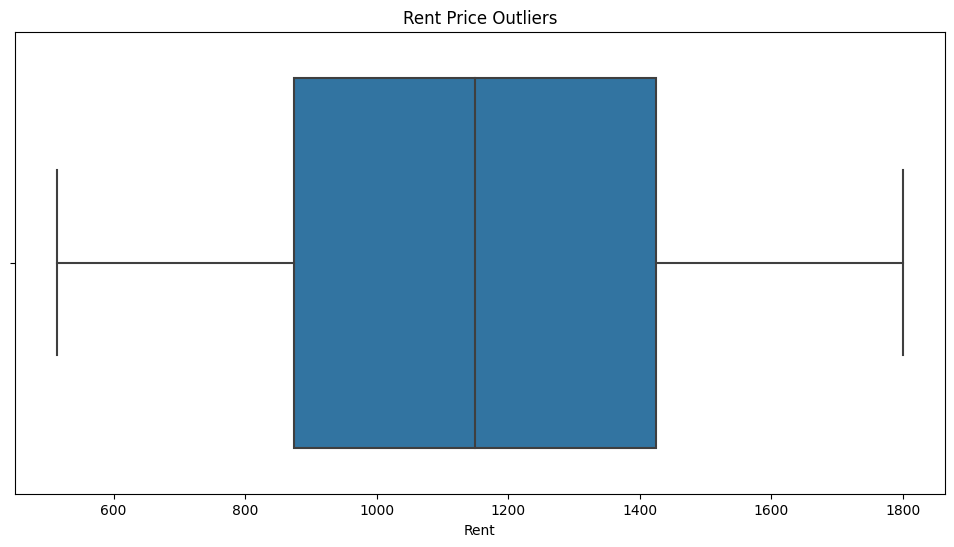

In [36]:

plt.figure(figsize=(12, 6))
sns.boxplot(x=df['Rent'])
plt.title('Rent Price Outliers')
plt.show()

# **Creating visualizations for the research questions**

Research Question 1: Average Rent by Number of Bedrooms

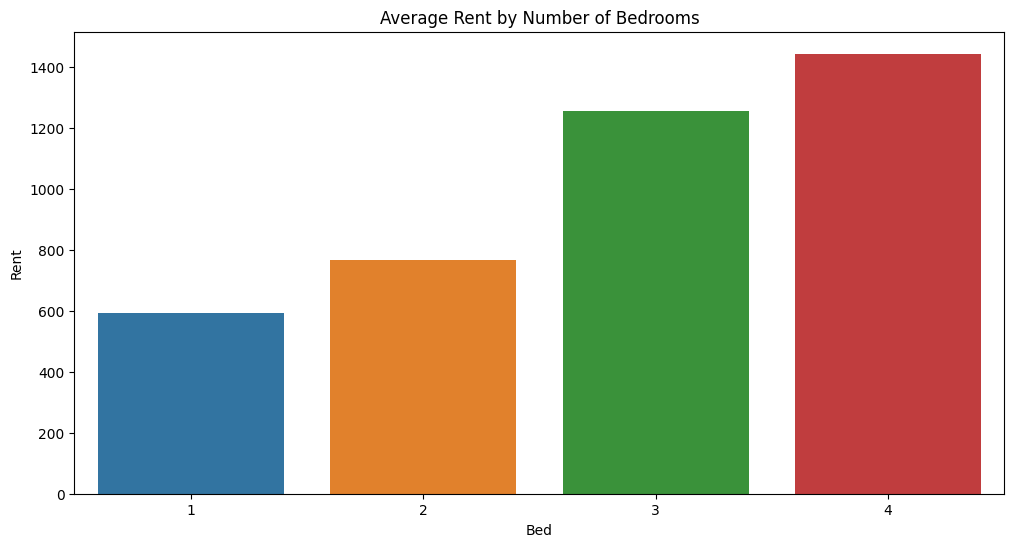

In [29]:
avg_rent_bedrooms = df.groupby('Bed')['Rent'].mean().reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(x='Bed', y='Rent', data=avg_rent_bedrooms)
plt.title('Average Rent by Number of Bedrooms')
plt.show()

Research Question 2: Average Rent by Number of Bathrooms

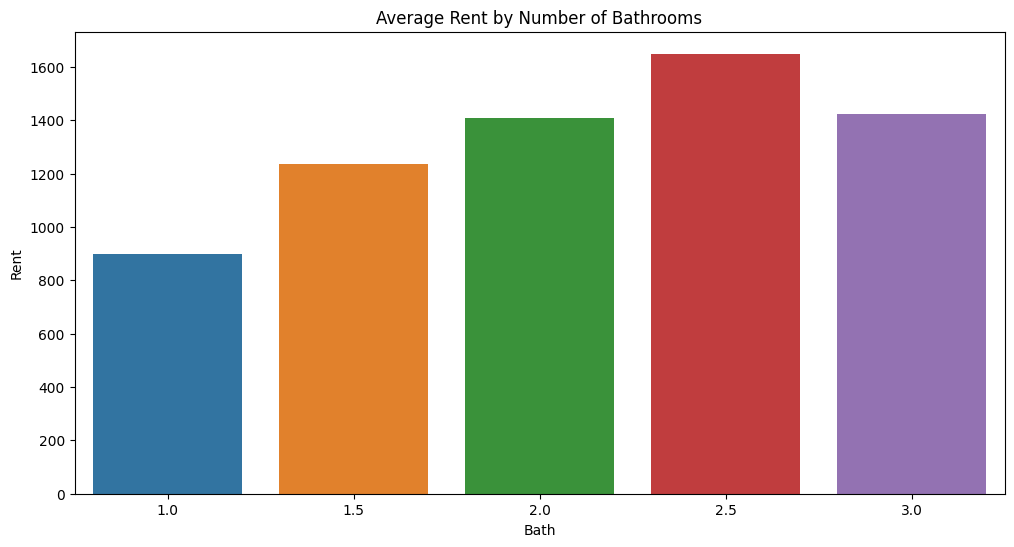

In [30]:
avg_rent_bathrooms = df.groupby('Bath')['Rent'].mean().reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(x='Bath', y='Rent', data=avg_rent_bathrooms)
plt.title('Average Rent by Number of Bathrooms')
plt.show()

**Research Questions for Line Charts**

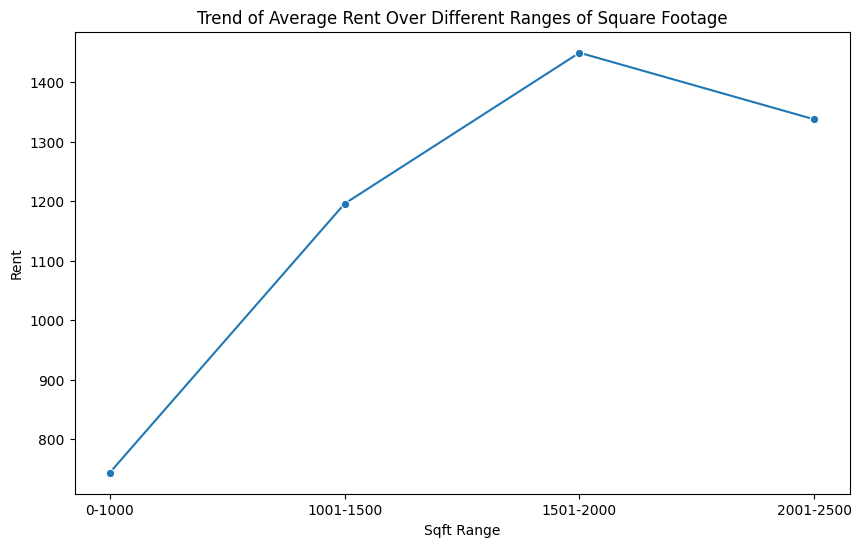

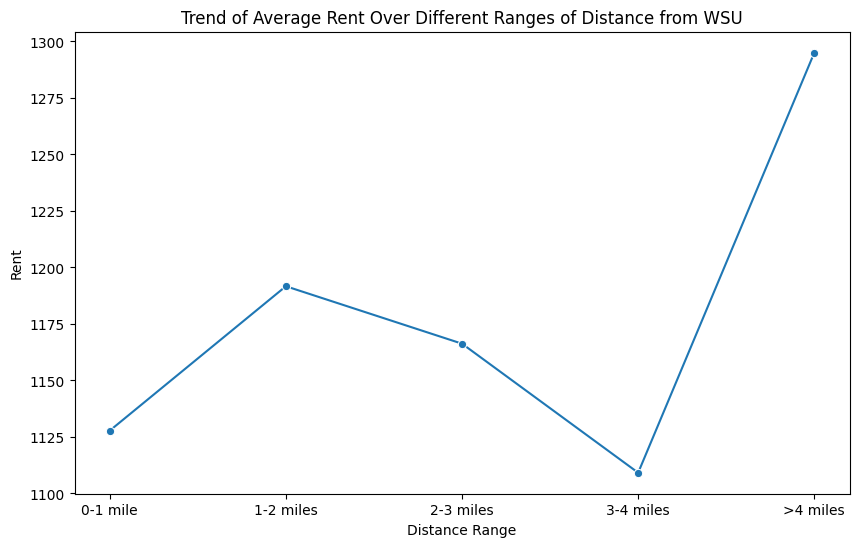

In [32]:

# Creating ranges for square footage and distance from WSU for line chart analysis
df['Sqft Range'] = pd.cut(df['Sqft'], bins=[0, 1000, 1500, 2000, 2500, np.inf], labels=['0-1000', '1001-1500', '1501-2000', '2001-2500', '>2500'])
df['Distance Range'] = pd.cut(df['Distance from Wsu'], bins=[0, 1, 2, 3, 4, np.inf], labels=['0-1 mile', '1-2 miles', '2-3 miles', '3-4 miles', '>4 miles'])

# Trend of Average Rent Over Different Ranges of Square Footage
avg_rent_sqft = df.groupby('Sqft Range')['Rent'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.lineplot(x='Sqft Range', y='Rent', data=avg_rent_sqft, marker='o')
plt.title('Trend of Average Rent Over Different Ranges of Square Footage')
plt.show()

# Trend of Average Rent Over Different Ranges of Distance from WSU
avg_rent_distance = df.groupby('Distance Range')['Rent'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.lineplot(x='Distance Range', y='Rent', data=avg_rent_distance, marker='o')
plt.title('Trend of Average Rent Over Different Ranges of Distance from WSU')
plt.show()

**Research Question for Pie Charts**

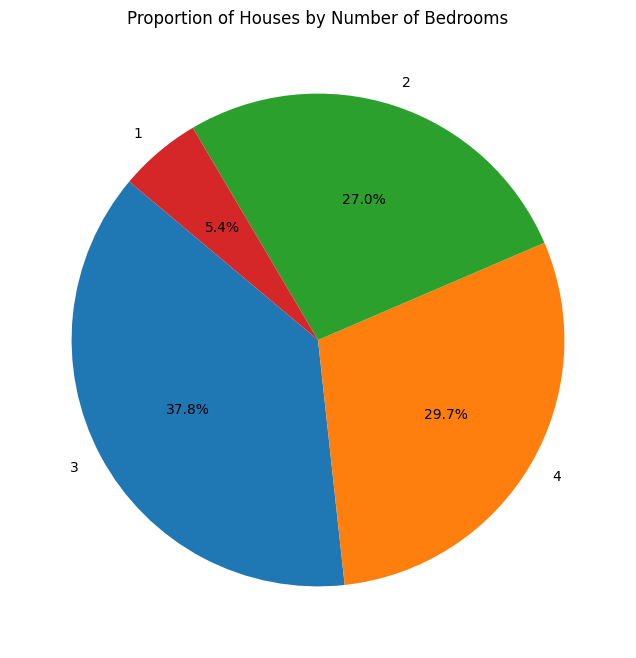

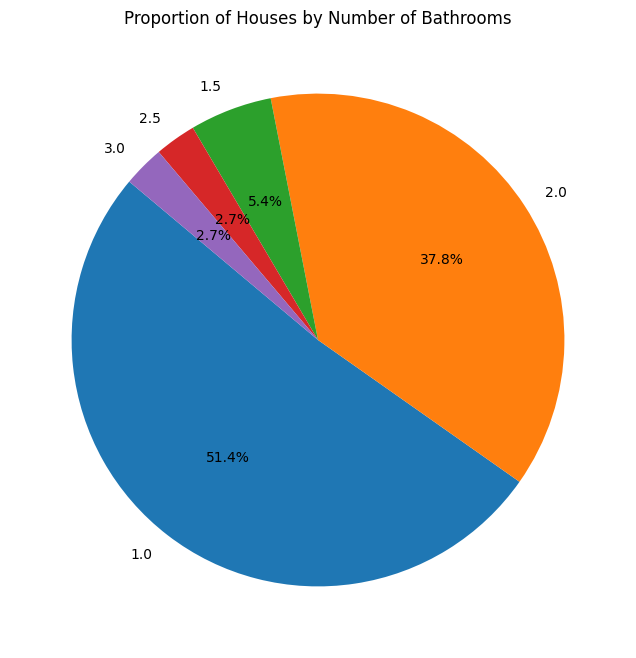

In [35]:
# Proportion of Houses by Number of Bedrooms
bedroom_counts = df['Bed'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(bedroom_counts, labels=bedroom_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Proportion of Houses by Number of Bedrooms')
plt.show()

# Proportion of Houses by Number of Bathrooms
bathroom_counts = df['Bath'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(bathroom_counts, labels=bathroom_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Proportion of Houses by Number of Bathrooms')
plt.show()

# **Target Selection**

In [18]:
target = 'Rent'

# **Feature Candidates**

In [ ]:
# Feature selection
features = ['Sqft', 'Bed', 'Bath', 'Distance from Wsu']

# **Split the dataset into training and testing sets**

In [19]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size=0.2, random_state=42)

# **Linear Regression Analysis**

Linear Regression - Metrics:
Mean Squared Error: 20015.974764780178
Mean Absolute Error: 135.3970722965233
R-squared: 0.7974788237936989




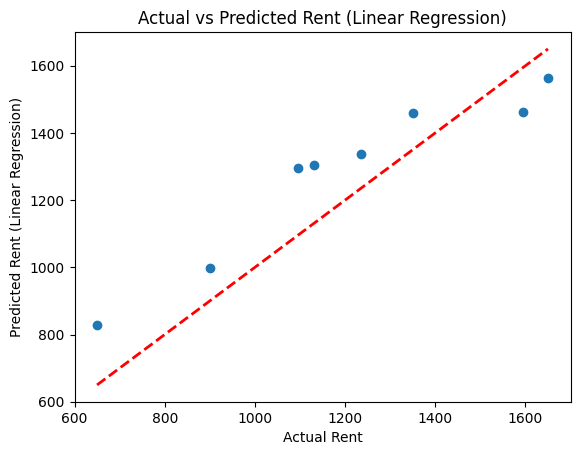

In [24]:

# Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_y_pred = lr_model.predict(X_test)

# Evaluate Linear Regression model
lr_mse = mean_squared_error(y_test, lr_y_pred)
lr_mae = mean_absolute_error(y_test, lr_y_pred)
lr_r2 = r2_score(y_test, lr_y_pred)

print('Linear Regression - Metrics:')
print(f'Mean Squared Error: {lr_mse}')
print(f'Mean Absolute Error: {lr_mae}')
print(f'R-squared: {lr_r2}')
print('\n')

# Scatter plot for Decision Tree
plt.scatter(y_test, lr_y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2)  # Regression line
plt.xlabel('Actual Rent')
plt.ylabel('Predicted Rent (Linear Regression)')
plt.title('Actual vs Predicted Rent (Linear Regression)')
plt.show()

# **Decision Tree Analysis**

Decision Tree - Metrics:
Mean Squared Error: 44065.625
Mean Absolute Error: 146.875
R-squared: 0.5541450111653459




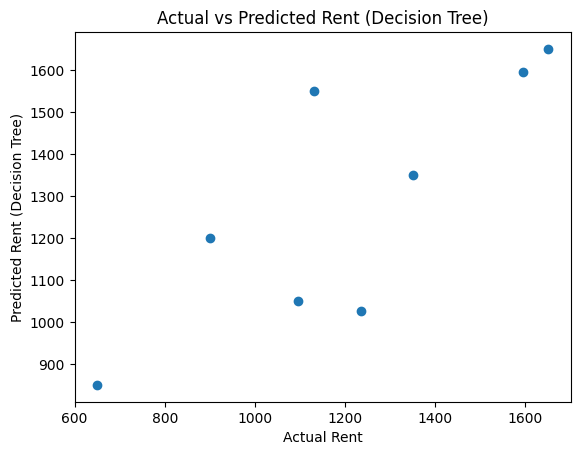

In [23]:
# Decision Tree Regressor
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train, y_train)
dt_y_pred = dt_model.predict(X_test)

# Evaluate Decision Tree model
dt_mse = mean_squared_error(y_test, dt_y_pred)
dt_mae = mean_absolute_error(y_test, dt_y_pred)
dt_r2 = r2_score(y_test, dt_y_pred)

print('Decision Tree - Metrics:')
print(f'Mean Squared Error: {dt_mse}')
print(f'Mean Absolute Error: {dt_mae}')
print(f'R-squared: {dt_r2}')
print('\n')

# Scatter plot for Decision Tree
plt.scatter(y_test, dt_y_pred)
plt.xlabel('Actual Rent')
plt.ylabel('Predicted Rent (Decision Tree)')
plt.title('Actual vs Predicted Rent (Decision Tree)')
plt.show()

# **Random Forest Analysis**

Random Forest - Metrics:
Mean Squared Error: 33994.19062500001
Mean Absolute Error: 161.68750000000003
R-squared: 0.6560475544928166




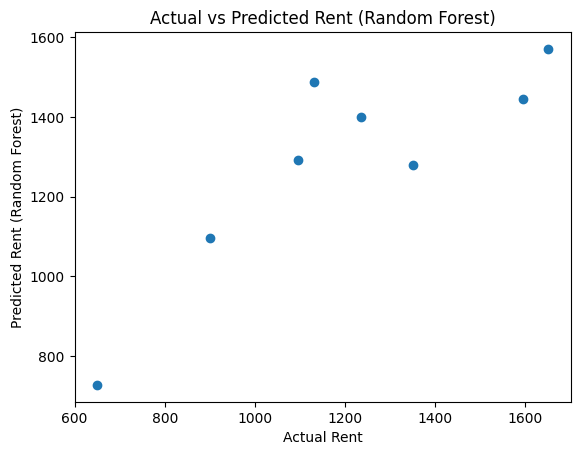

In [42]:
# Random Forest Regressor
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)
rf_y_pred = rf_model.predict(X_test)

# Evaluate Random Forest model
rf_mse = mean_squared_error(y_test, rf_y_pred)
rf_mae = mean_absolute_error(y_test, rf_y_pred)
rf_r2 = r2_score(y_test, rf_y_pred)

print('Random Forest - Metrics:')
print(f'Mean Squared Error: {rf_mse}')
print(f'Mean Absolute Error: {rf_mae}')
print(f'R-squared: {rf_r2}')
print('\n')

# Scatter plot for Random Forest
plt.scatter(y_test, rf_y_pred)
plt.xlabel('Actual Rent')
plt.ylabel('Predicted Rent (Random Forest)')
plt.title('Actual vs Predicted Rent (Random Forest)')
plt.show()


# **K-Nearest Neighbors (KNN) Analysis**

KNN - Metrics:
Mean Squared Error: 24685.5
Mean Absolute Error: 125.75
R-squared: 0.7502326739521372




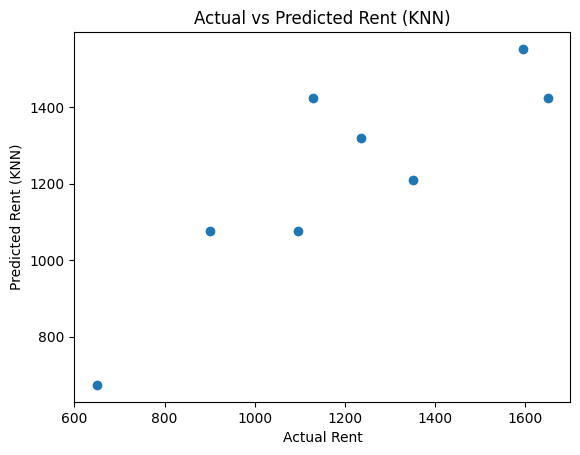

In [26]:
# K-Nearest Neighbors (KNN) Regressor
knn_model = KNeighborsRegressor()
knn_model.fit(X_train, y_train)
knn_y_pred = knn_model.predict(X_test)

# Evaluate KNN model
knn_mse = mean_squared_error(y_test, knn_y_pred)
knn_mae = mean_absolute_error(y_test, knn_y_pred)
knn_r2 = r2_score(y_test, knn_y_pred)

print('KNN - Metrics:')
print(f'Mean Squared Error: {knn_mse}')
print(f'Mean Absolute Error: {knn_mae}')
print(f'R-squared: {knn_r2}')
print('\n')

# Scatter plot for KNN
plt.scatter(y_test, knn_y_pred)
plt.xlabel('Actual Rent')
plt.ylabel('Predicted Rent (KNN)')
plt.title('Actual vs Predicted Rent (KNN)')
plt.show()


# **Support Vector Machine (SVM) Analysis**

SVM - Metrics:
Mean Squared Error: 99759.78761427729
Mean Absolute Error: 255.2038870753439
R-squared: -0.009367256062090545




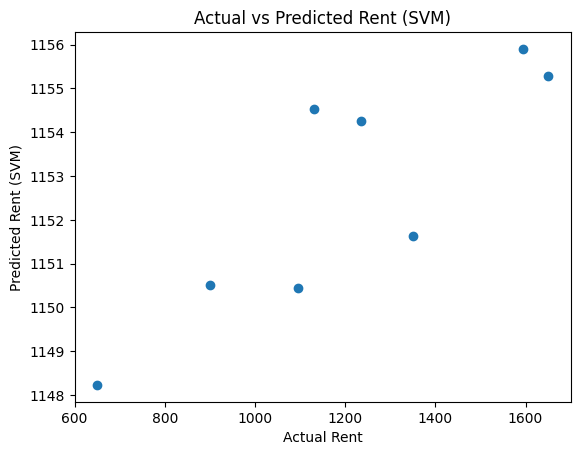

In [27]:
# Support Vector Machine (SVM) Regressor
svm_model = SVR()
svm_model.fit(X_train, y_train)
svm_y_pred = svm_model.predict(X_test)

# Evaluate SVM model
svm_mse = mean_squared_error(y_test, svm_y_pred)
svm_mae = mean_absolute_error(y_test, svm_y_pred)
svm_r2 = r2_score(y_test, svm_y_pred)

print('SVM - Metrics:')
print(f'Mean Squared Error: {svm_mse}')
print(f'Mean Absolute Error: {svm_mae}')
print(f'R-squared: {svm_r2}')
print('\n')

# Scatter plot for SVM
plt.scatter(y_test, svm_y_pred)
plt.xlabel('Actual Rent')
plt.ylabel('Predicted Rent (SVM)')
plt.title('Actual vs Predicted Rent (SVM)')
plt.show()
